In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
'''
Dataframe of top 49 highest grossing profit movies from Wikipedia 
'''

In [613]:
WikipediaHighestGross= pd.read_html('https://en.wikipedia.org/wiki/List_of_highest-grossing_films')[0]
WikipediaHighestGross

,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avengers: Endgame,"$2,797,800,564",2019,[# 1][# 2]
1,2,1,Avatar,"$2,790,439,000",2009,[# 3][# 4]
2,3,1,Titanic,"$2,194,439,542",1997,[# 5][# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7][# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9][# 10]
5,6,3,Jurassic World,"$1,671,713,208",2015,[# 11][# 12]
6,7,7,The Lion King,"$1,656,943,394",2019,[# 13][# 2]
7,8,3,The Avengers,"$1,518,812,988",2012,[# 14][# 15]
8,9,4,Furious 7,"$1,516,045,911",2015,[# 16][# 17]
9,10,10,Frozen II,"$1,450,026,933",2019,[# 18]


In [ ]:
'''
Extract titles from Wikipedea Dataframe
'''

In [614]:
HighestGrossFilmTitle = WikipediaHighestGross['Title']
HighestGrossFilmTitle

0                                 Avengers: Endgame
1                                            Avatar
2                                           Titanic
3                      Star Wars: The Force Awakens
4                            Avengers: Infinity War
5                                    Jurassic World
6                                     The Lion King
7                                      The Avengers
8                                         Furious 7
9                                         Frozen II
10                          Avengers: Age of Ultron
11                                    Black Panther
12    Harry Potter and the Deathly Hallows – Part 2
13                         Star Wars: The Last Jedi
14                   Jurassic World: Fallen Kingdom
15                                           Frozen
16                             Beauty and the Beast
17                                    Incredibles 2
18                          The Fate of the Furious
19          

In [ ]:
'''
Function that passes a list of movies through the tmdb api and returns each movie title, genre, overview, budget and revenue
'''

In [615]:
import requests
def tmdbapi(df):
    a=df.values.tolist()
    b=0
    c=0
    k=0
    listcount5=0
    listcount6=0
    g=[]
    h=[]
    for m in a:
        response1 = requests.get(f"https://api.themoviedb.org/3/search/movie?api_key=2b60ebb07fcf8235d5645c1474f2b129&query={m}")
        b+=1
        #listcount5+=1
        if b==len(a):
            break
        #print(listcount5)
        #print(response1)
        try:
            s=response1.json()['results'][0]['id']
            for i in range(0,len(a)):
                t = str(s)
                #listcount6+=1
                #print(listcount6)
                #print(t)
                g.append(t)
                break
        except IndexError:
            pass
    for i in range(0,len(g)):
        k=[]
        c+=1
        id = g[i]
        response2 = requests.get(f"https://api.themoviedb.org/3/movie/{id}?api_key=2b60ebb07fcf8235d5645c1474f2b129")
        k.append(c)
        #print(k)
        k.append(response2.json()['original_title'])
        #print(k)
        k.append(response2.json()['genres'][0]['name'])
        #print(k)
        k.append(response2.json()['overview'])
        h.append(k)
        k.append(response2.json()['budget'])
        #print(k)
        k.append(response2.json()['revenue'])
    
    return(h)

In [616]:
'''
Pass Wikipedia Highest Gross Profit titles through tmdbapi function to create Highest Gross Profit Dataframe
'''

'\nPass Wikipedia Highest Gross Profit titles through tmdbapi function to create Highest Gross Profit Dataframe\n'

In [617]:
HighestGrossProfit=pd.DataFrame(tmdbapi(HighestGrossFilmTitle))
HighestGrossProfit

,0,1,2,3,4,5
0,1,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000,2797800564
1,2,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000,2787965087
2,3,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000,1845034188
3,4,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000,2068223624
4,5,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000,2046239637
5,6,Jurassic World: Fallen Kingdom,Action,Three years after the demise of Jurassic World...,170000000,1303459585
6,7,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000,1656943394
7,8,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000,1519557910
8,9,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000,1506249360
9,10,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000,1330764959


In [ ]:
'''
Edit column names of Highest Gross Profit Dataframe
'''

In [618]:
HighestGrossProfit.rename(columns={0:"Movie:",1: "Title", 2: "Genre",3:"Description",4:"Budget",5:"Revenue"}, inplace = True)

HighestGrossProfit

,Movie:,Title,Genre,Description,Budget,Revenue
0,1,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000,2797800564
1,2,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000,2787965087
2,3,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000,1845034188
3,4,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000,2068223624
4,5,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000,2046239637
5,6,Jurassic World: Fallen Kingdom,Action,Three years after the demise of Jurassic World...,170000000,1303459585
6,7,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000,1656943394
7,8,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000,1519557910
8,9,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000,1506249360
9,10,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000,1330764959


In [ ]:
'''
Create a new column in Highest Gross Profit Dataframe, Gross Profit, from the difference of Revenue and Budget
'''

In [619]:
HighestGrossProfit['Gross Profit']= HighestGrossProfit["Revenue"] - HighestGrossProfit["Budget"]
HighestGrossProfit

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit
0,1,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000,2797800564,2441800564
1,2,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000,2787965087,2550965087
2,3,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000,1845034188,1645034188
3,4,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000,2068223624,1823223624
4,5,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000,2046239637,1746239637
5,6,Jurassic World: Fallen Kingdom,Action,Three years after the demise of Jurassic World...,170000000,1303459585,1133459585
6,7,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000,1656943394,1396943394
7,8,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000,1519557910,1299557910
8,9,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000,1506249360,1316249360
9,10,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000,1330764959,1297764959


In [ ]:
'''
Extract Years from Wikipedea Dataframe
'''

In [620]:
HighestGrossProfitFilmYear = WikipediaHighestGross['Year']
HighestGrossFilmYear

0     2019
1     2009
2     1997
3     2015
4     2018
5     2015
6     2019
7     2012
8     2015
9     2019
10    2015
11    2018
12    2011
13    2017
14    2018
15    2013
16    2017
17    2018
18    2017
19    2013
20    2015
21    2016
22    2018
23    2003
24    2019
25    2019
26    2011
27    2012
28    2014
29    2012
30    2019
31    2019
32    2019
33    2010
34    2006
35    2016
36    2019
37    2011
38    2017
39    1993
40    2016
41    1999
42    2010
43    2016
44    2012
45    2008
46    2001
47    2013
48    1994
49    2016
Name: Year, dtype: int64

In [ ]:
'''
Concatenate Year column to Highest Gross Profit Dataframe
'''

In [621]:
HighestGrossProfit = pd.concat([HighestGrossProfit,HighestGrossProfitFilmYear], axis=1)
HighestGrossProfit

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,Year
0,1.0,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000.0,2.797801e+09,2.441801e+09,2019
1,2.0,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000.0,2.787965e+09,2.550965e+09,2009
2,3.0,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000.0,1.845034e+09,1.645034e+09,1997
3,4.0,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000.0,2.068224e+09,1.823224e+09,2015
4,5.0,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000.0,2.046240e+09,1.746240e+09,2018
5,6.0,Jurassic World: Fallen Kingdom,Action,Three years after the demise of Jurassic World...,170000000.0,1.303460e+09,1.133460e+09,2015
6,7.0,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000.0,1.656943e+09,1.396943e+09,2019
7,8.0,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000.0,1.519558e+09,1.299558e+09,2012
8,9.0,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000.0,1.506249e+09,1.316249e+09,2015
9,10.0,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000.0,1.330765e+09,1.297765e+09,2019


In [ ]:
'''
Function that adjusts for inflation
'''

In [622]:
import cpi
import itertools

def inflation_adjust(amount,year):
    list1=[]
    for n, u in enumerate(year):#cpi.inflate function doesn't recognize year 2019
        if u == 2019:
            year[n] = 2018
    
    
    for (i,l) in zip(amount,year):
#             print(i)
#             print(l)
            t=cpi.inflate(i, l)
            list1.append(t)
    return(list1)

In [ ]:
'''
Clean data that is to be passed through function
'''

In [623]:
HighestGrossProfitList=HighestGrossProfit[["Gross Profit"]].values.T.tolist()
HighestGrossProfitYearList=HighestGrossProfit[["Year"]].values.T.tolist()
HighestGrossProfitList=HighestGrossProfitList[0]
HighestGrossProfitYearList=HighestGrossProfitYearList[0]
HighestGrossProfitYearList

[2019,
 2009,
 1997,
 2015,
 2018,
 2015,
 2019,
 2012,
 2015,
 2019,
 2015,
 2018,
 2011,
 2017,
 2018,
 2013,
 2017,
 2018,
 2017,
 2013,
 2015,
 2016,
 2018,
 2003,
 2019,
 2019,
 2011,
 2012,
 2014,
 2012,
 2019,
 2019,
 2019,
 2010,
 2006,
 2016,
 2019,
 2011,
 2017,
 1993,
 2016,
 1999,
 2010,
 2016,
 2012,
 2008,
 2001,
 2013,
 1994,
 2016]

In [ ]:
'''
Pass lists through function
'''

In [624]:
InflationAdjustedGrossProfit=pd.DataFrame(inflation_adjust(HighestGrossProfitList,HighestGrossProfitYearList))
InflationAdjustedGrossProfit

,0
0,2.441801e+09
1,2.985803e+09
2,2.573705e+09
3,1.931609e+09
4,1.746240e+09
5,1.200841e+09
6,1.396943e+09
7,1.421327e+09
8,1.394497e+09
9,1.297765e+09


In [ ]:
'''
Name dataframe Gross Profit Inflation Adjusted
'''

In [625]:
InflationAdjustedGrossProfit.rename(columns={0:"Gross Profit Inflation Adjusted"}, inplace = True)

InflationAdjustedGrossProfit

,Gross Profit Inflation Adjusted
0,2.441801e+09
1,2.985803e+09
2,2.573705e+09
3,1.931609e+09
4,1.746240e+09
5,1.200841e+09
6,1.396943e+09
7,1.421327e+09
8,1.394497e+09
9,1.297765e+09


In [ ]:
'''
Concatenate Gross Profit Inflation Adjusted dataframe to HighestGrossProfit dataframe
'''

In [626]:
HighestGrossProfit = pd.concat([HighestGrossProfit,InflationAdjustedGrossProfit], axis=1)
HighestGrossProfit

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,Year,Gross Profit Inflation Adjusted
0,1.0,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000.0,2.797801e+09,2.441801e+09,2019,2.441801e+09
1,2.0,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000.0,2.787965e+09,2.550965e+09,2009,2.985803e+09
2,3.0,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000.0,1.845034e+09,1.645034e+09,1997,2.573705e+09
3,4.0,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000.0,2.068224e+09,1.823224e+09,2015,1.931609e+09
4,5.0,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000.0,2.046240e+09,1.746240e+09,2018,1.746240e+09
5,6.0,Jurassic World: Fallen Kingdom,Action,Three years after the demise of Jurassic World...,170000000.0,1.303460e+09,1.133460e+09,2015,1.200841e+09
6,7.0,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000.0,1.656943e+09,1.396943e+09,2019,1.396943e+09
7,8.0,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000.0,1.519558e+09,1.299558e+09,2012,1.421327e+09
8,9.0,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000.0,1.506249e+09,1.316249e+09,2015,1.394497e+09
9,10.0,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000.0,1.330765e+09,1.297765e+09,2019,1.297765e+09


In [1]:
'''
Extract Genres from Highest Gross Profit Dataframe
'''

'\nHighest gross profit movies by genre percentage total \n'

In [627]:
HighestGrossProfitGenre = HighestGrossProfit['Genre']
HighestGrossProfitGenre

0           Adventure
1              Action
2               Drama
3              Action
4           Adventure
5              Action
6           Adventure
7     Science Fiction
8              Action
9           Animation
10             Action
11             Action
12            Fantasy
13    Science Fiction
14             Action
15          Animation
16            Romance
17             Action
18             Action
19             Action
20             Family
21          Adventure
22             Action
23          Adventure
24             Action
25             Action
26             Action
27             Action
28    Science Fiction
29             Action
30              Crime
31             Action
32          Adventure
33          Animation
34          Adventure
35             Action
36          Adventure
37          Adventure
38             Action
39          Adventure
40          Adventure
41          Adventure
42             Family
43          Animation
44          Adventure
45        

In [ ]:
'''
Function that determines the percentage of each movie genre in a list
'''

In [ ]:
import matplotlib.pyplot as plt

k=[]
def genre_percent(genres):
    s=set(genres)
    for i in s:
        df1 = genres.str.contains(f"{i}")#returns each time a genre appeared as True and the other times as False
        #print(df1)
        t = list(filter(lambda l: df1[l], range(len(df1))))#returns all times a genre appeared as True
        #print(t)
        variable=(len(t)/len(df1))*100#determines the genre pecentage from the total genres
        k.append(variable)
        
#         print(i)
#         print(f"{variable}%")
        
    
    # using zip() to convert lists to dictionary to order percentages so that slices of pie chart are numerically ordered
    r = dict(zip(s, k))
    print(r)
    from collections import OrderedDict
    d = OrderedDict(sorted(r.items(), key=lambda x: x[1]))
    #print(d)
    o=d.keys()
    h=d.values()
    
    labels = o
    sizes = h
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 8},rotatelabels=True)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    
    #plt.savefig('mapc.png')
    plt.tight_layout()

In [ ]:
'''
Bellow is a pie chart displaying the percentage of each genre used.  The most used genres where Action at 38.8% and 
Adventure at 30.6%.  
'''

{'Animation': 10.204081632653061, 'Action': 38.775510204081634, 'Fantasy': 4.081632653061225, 'Crime': 2.0408163265306123, 'Adventure': 30.612244897959183, 'Drama': 4.081632653061225, 'Romance': 2.0408163265306123, 'Science Fiction': 4.081632653061225, 'Family': 4.081632653061225}


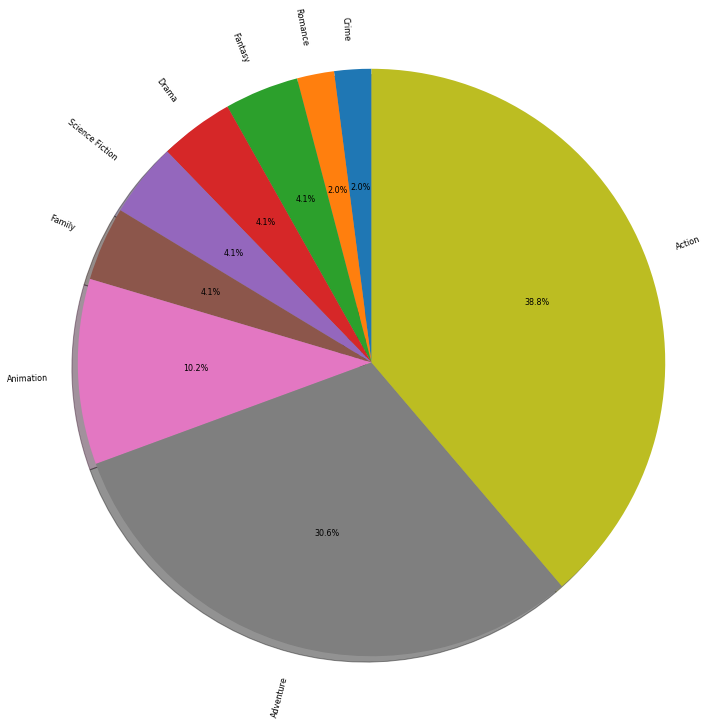

In [107]:
genre_percent(dfHighestGrossProfitGenre)

In [ ]:
'''
Highest gross profit movies' Inflation Adjusted summary statistics
'''

In [628]:
HighestGrossProfit[["Gross Profit Inflation Adjusted"]].describe()

,Gross Profit Inflation Adjusted
count,4.900000e+01
mean,1.217585e+09
std,4.922178e+08
min,3.609566e+08
25%,9.505841e+08
50%,1.041891e+09
75%,1.358033e+09
max,2.985803e+09


In [ ]:
'''
Highest gross profit movies' Inflation Adjusted box plot has 4 outliers on the upper outer fence
'''

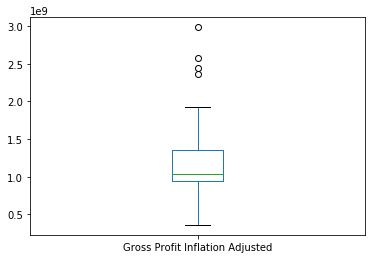

In [629]:
HighestGrossProfit[["Gross Profit Inflation Adjusted"]].plot.box();
#plt.savefig('gpbp.png')

In [ ]:
'''
Most highest gross profit movies have occured in past decade
'''

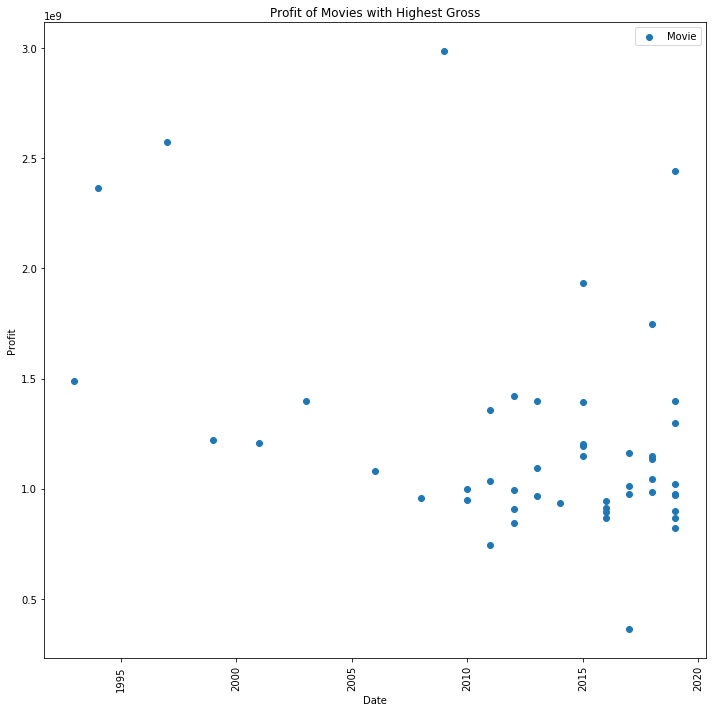

In [630]:
# Set the figure size in inches
plt.figure(figsize=(8,6))

plt.scatter(HighestGrossProfitYear, HighestGrossProfit[["Gross Profit Inflation Adjusted"]],label = "Movie" )

# Set x and y axes labels and title
plt.xlabel('Date')
plt.xticks( rotation=90, fontsize=10);
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.ylabel('Profit')

plt.title('Profit of Movies with Highest Gross')
plt.legend()
plt.tight_layout()
#plt.savefig('gpsp.png')

In [ ]:
'''
Function that counts the most common 50 words in the total Highest Gross Profit movies' decription
'''

In [ ]:
#Passes a list of movie descriptions and returns a word count of the most common words
def word_count(df):
    df1 = df['Description']
    csv_data = df1.to_csv()
    # Split the transcript into words
    words = csv_data.split()
    # Create a dictionary
    word_counts = {}
    # Iterate through the text
    for word in words:
        # Update word counts
        word_counts[word] = word_counts.get(word, 0) + 1 #Get previous entry, update by 1?
    # Convert to a list
    counts = list(word_counts.items())
    # Sort words by count
    top=sorted(counts, key = lambda x: x[1], reverse=True)
    top_50 = sorted(counts, key = lambda x: x[1], reverse=True)[:50]
    # Store word counts 
    y = [item[1] for item in top_50]
    # Create x-axis ticks
    X = np.arange(len(y))
    # Create figure object with size = 40x40
    plt.figure(figsize=(100,100))
    # Create Bar Graph
    plt.bar(X , y)
    # Use words as x-axis tick labels
    plt.xticks(X, [item[0] for item in top_50], size = 50, rotation=90);
    plt.yticks(size = 60);
    # Include descriptive titles and labels
    plt.ylabel('Number of Occurences')
    plt.xlabel('Word')
    plt.title('Top 50 Words')
    
    print(top)
    #plt.savefig('gpbg.png')

In [ ]:
'''
Highest gross profit movies' description list
'''

In [95]:
HighestGrossProfitDescription=HighestGrossProfit[["Description"]]
HighestGrossProfitDescription

,Description
0,After the devastating events of Avengers: Infi...
1,"In the 22nd century, a paraplegic Marine is di..."
2,101-year-old Rose DeWitt Bukater tells the sto...
3,Thirty years after defeating the Galactic Empi...
4,As the Avengers and their allies have continue...
5,Twenty-two years after the events of Jurassic ...
6,"Simba idolizes his father, King Mufasa, and ta..."
7,When an unexpected enemy emerges and threatens...
8,Deckard Shaw seeks revenge against Dominic Tor...
9,"Elsa, Anna, Kristoff and Olaf head far into th..."


In [ ]:
'''
Help and World are signifiacant frequent words
'''

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


[('the', 162), ('to', 88), ('and', 76), ('of', 69), ('a', 60), ('his', 38), ('is', 28), ('in', 24), ('with', 20), ('from', 20), ('an', 19), ('for', 18), ('as', 15), ('her', 13), ('by', 12), ('that', 12), ('on', 11), ('new', 11), ('world', 11), ('help', 9), ('she', 9), ('With', 8), ('have', 8), ('their', 7), ('has', 7), ('will', 7), ('The', 7), ('into', 7), ('about', 7), ('him', 7), ('he', 7), ('all', 6), ('-', 6), ('remaining', 5), ('once', 5), ('be', 5), ('years', 5), ('after', 5), ('up', 5), ('former', 5), ('battle', 5), ('go', 5), ('who', 5), ('while', 5), ('at', 5), ('events', 4), ('Avengers', 4), ('what', 4), ('but', 4), ('between', 4), ('young', 4), ('Meanwhile,', 4), ('Jack', 4), ('first', 4), ('one', 4), ('takes', 4), ('But', 4), ('heir', 4), ('plans', 4), ('out', 4), ('take', 4), ('finds', 4), ('learn', 4), ('are', 4), ('home', 4), ('However,', 4), ('dinosaurs', 4), ('park', 4), ('woman', 4), ('or', 4), ('powerful', 4), ('adventure', 4), ('can', 4), ('must', 3), ('following', 

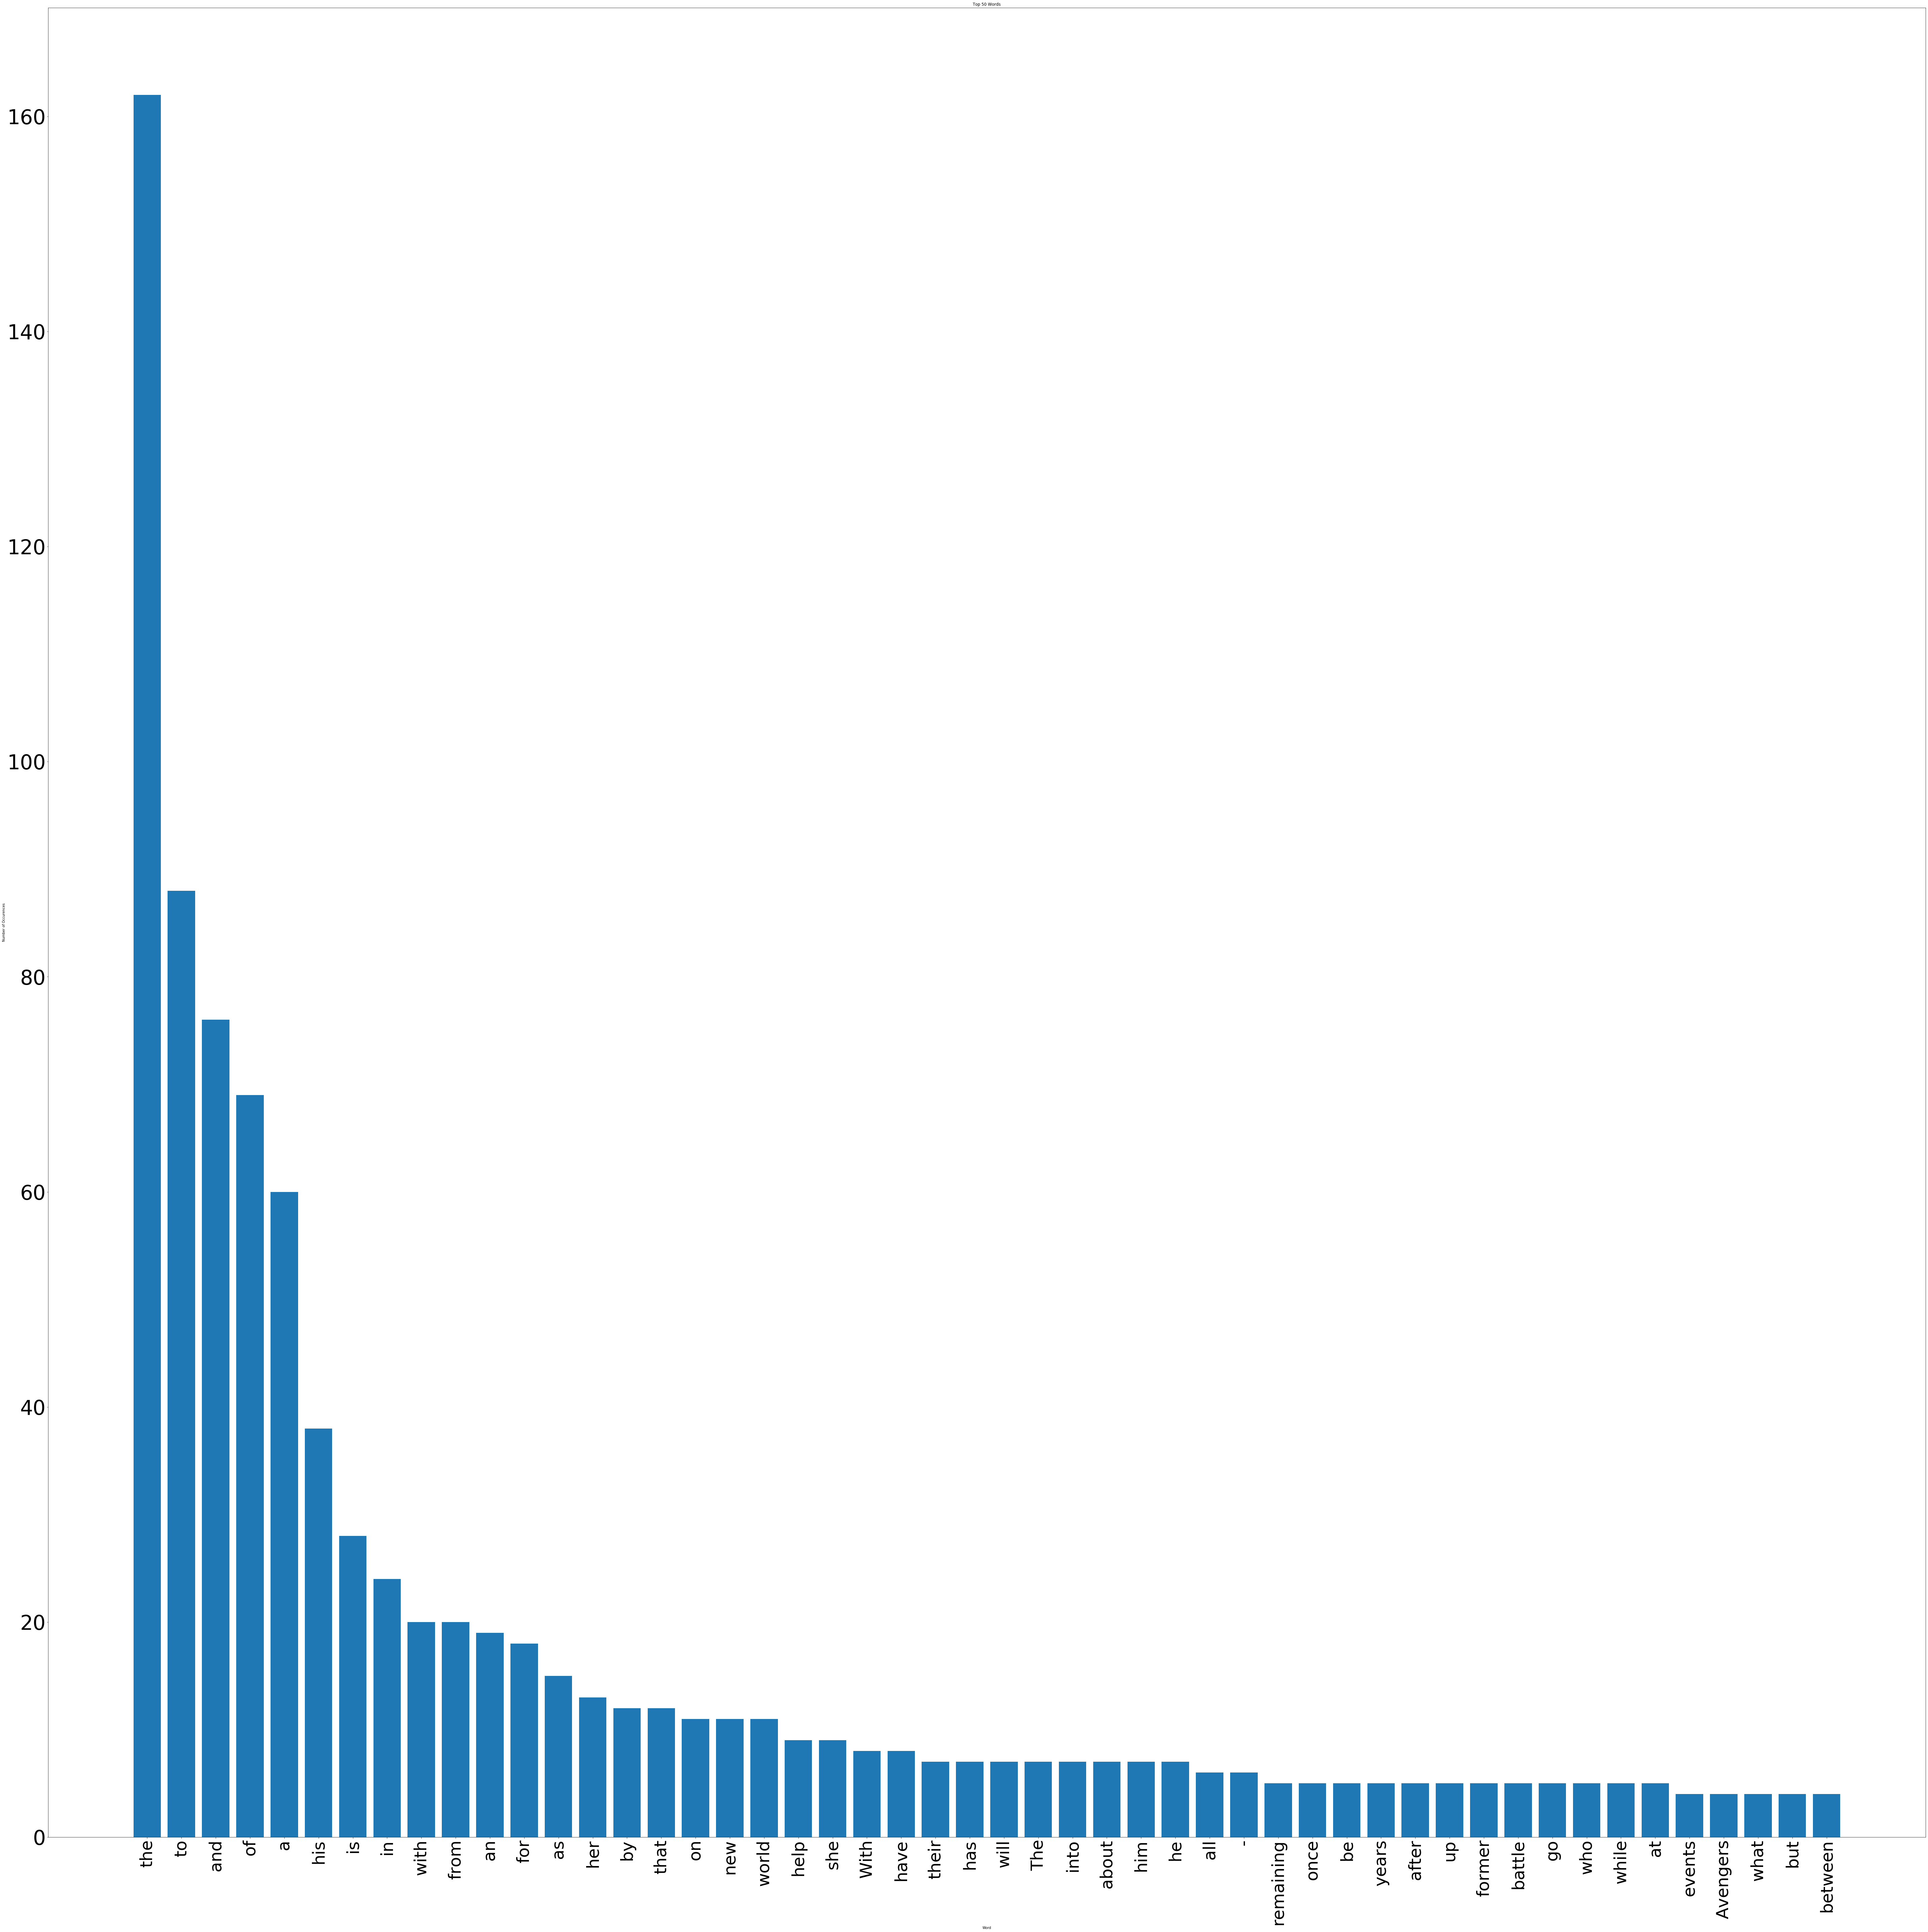

In [94]:
word_count(HighestGrossProfitDescription)


In [ ]:
'''
Dataframe of top 115 movies that recieved the most awards from Wikipedia 
'''

In [567]:
WikipediaMostAwards= pd.read_html('https://en.wikipedia.org/wiki/List_of_films_with_the_most_Academy_Awards_per_ceremony')[0]
WikipediaMostAwards

Academy Awards Season                                    Film Title  \
                 Ceremony      Year in Film                  Film Title   
0                     1st         1927–1928                  7th Heaven   
1                     1st         1927–1928                     Sunrise   
2                     2nd         1928–1929  The Bridge of San Luis Rey   
3                     2nd         1928–1929         The Broadway Melody   
4                     2nd         1928–1929                    Coquette   
..                    ...               ...                         ...   
111                  89th              2016                  La La Land   
112                  90th              2017          The Shape of Water   
113                  91st              2018           Bohemian Rhapsody   
114                  92nd              2019                    Parasite   
115         92 Ceremonies  93 Years in Film             115 Film Titles   

    Best Picture                 Awards[A]      Nominations          Notes  
          Winner       Nominee   Awards[A]      Nominations          Notes  
0            NaN             ✓           3                5            NaN  
1            NaN           NaN           3                4            [B]  
2            NaN           NaN           1                1            NaN  
3              ✓             ✓           1                3            NaN  
4            NaN           NaN           1                1            NaN  
..           ...           ...         ...              ...            ...  
111          NaN             ✓           6               14            NaN  
112            ✓             ✓           4               13            NaN  
113          NaN             ✓           4                5            NaN  
114            ✓             ✓           4                6            NaN  
115   73 Winners  106 Nominees  571 Awards  985 Nominations  Column Totals  

[116 rows x 8 columns]

In [ ]:
'''
Extract Titles from Wikipedea Dataframe
'''

In [568]:
MostAwardsFilmTitle = WikipediaMostAwards['Film Title']
MostAwardsFilmTitle

,Film Title
0,7th Heaven
1,Sunrise
2,The Bridge of San Luis Rey
3,The Broadway Melody
4,Coquette
...,...
111,La La Land
112,The Shape of Water
113,Bohemian Rhapsody
114,Parasite


In [ ]:
'''
Passes titles through tmdbapi function to create Most Awards Dataframe
'''

In [569]:
MostAwards=pd.DataFrame(tmdbapi(MostAwardsFilmTitle))
MostAwards

,0,1,2,3,4,5
0,1,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,0,0
1,2,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2500000,5535405
2,3,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,0,0
3,4,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",379000,4358000
4,5,Coquette,Drama,A Southern belle's flirtation with a working m...,0,0
...,...,...,...,...,...,...
110,111,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,150000000,378858340
111,112,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",30000000,445435700
112,113,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",19500000,194989655
113,114,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",52000000,894027543


In [ ]:
'''
Edit column names of Highest Gross Profit Dataframe
'''

In [570]:
MostAwards.rename(columns={0:"Movie:",1: "Title", 2: "Genre",3:"Description",4:"Budget",5:"Revenue"}, inplace = True)

MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue
0,1,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,0,0
1,2,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2500000,5535405
2,3,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,0,0
3,4,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",379000,4358000
4,5,Coquette,Drama,A Southern belle's flirtation with a working m...,0,0
...,...,...,...,...,...,...
110,111,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,150000000,378858340
111,112,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",30000000,445435700
112,113,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",19500000,194989655
113,114,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",52000000,894027543


In [ ]:
'''
Change the 0 values in Most Awards Dataframe to the mean of their respective columns 
'''

In [571]:
MostAwards=MostAwards.mask(MostAwards==0).fillna(MostAwards.mean())
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue
0,1,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.729676e+08
1,2,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06
2,3,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.729676e+08
3,4,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06
4,5,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.729676e+08
...,...,...,...,...,...,...
110,111,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,1.500000e+08,3.788583e+08
111,112,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08
112,113,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08
113,114,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08


In [ ]:
'''
Create a new column in Most Awards Dataframe, Gross Profit, from the difference of Revenue and Budget
'''

In [572]:
MostAwards['Gross Profit']= MostAwards["Revenue"] - MostAwards["Budget"]
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit
0,1,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.729676e+08,1.469472e+08
1,2,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06,3.035405e+06
2,3,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.729676e+08,1.469472e+08
3,4,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06,3.979000e+06
4,5,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.729676e+08,1.469472e+08
...,...,...,...,...,...,...,...
110,111,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,1.500000e+08,3.788583e+08,2.288583e+08
111,112,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08,4.154357e+08
112,113,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08,1.754897e+08
113,114,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08,8.420275e+08


In [ ]:
'''
Extract Year in Film from Wikipedea Dataframe
'''

In [573]:
MostAwardsFilmYear = WikipediaMostAwards['Academy Awards Season','Year in Film']
MostAwardsFilmYear

0             1927–1928
1             1927–1928
2             1928–1929
3             1928–1929
4             1928–1929
             ...       
111                2016
112                2017
113                2018
114                2019
115    93 Years in Film
Name: (Academy Awards Season, Year in Film), Length: 116, dtype: object

In [ ]:
'''
Concatenate Year in Film column to Most Awards Dataframe
'''

In [574]:
MostAwards = pd.concat([MostAwards,MostAwardsFilmYear], axis=1)
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,"(Academy Awards Season, Year in Film)"
0,1.0,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.729676e+08,1.469472e+08,1927–1928
1,2.0,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06,3.035405e+06,1927–1928
2,3.0,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.729676e+08,1.469472e+08,1928–1929
3,4.0,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06,3.979000e+06,1928–1929
4,5.0,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.729676e+08,1.469472e+08,1928–1929
...,...,...,...,...,...,...,...,...
111,112.0,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08,4.154357e+08,2016
112,113.0,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08,1.754897e+08,2017
113,114.0,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08,8.420275e+08,2018
114,115.0,Parasite,Horror,Paul Dean has created a deadly parasite that i...,8.000000e+05,7.000000e+06,6.200000e+06,2019


In [ ]:
'''
Extract Awards[A] from Wikipedea Dataframe
'''

In [575]:
MostAwardsFilmAwardsAmount = WikipediaMostAwards['Awards[A]']
MostAwardsFilmAwardsAmount

,Awards[A]
0,3
1,3
2,1
3,1
4,1
...,...
111,6
112,4
113,4
114,4


In [ ]:
'''
Rename Awards[A] column as Number of Awards Won
'''

In [576]:
MostAwardsFilmAwardsAmount.rename(columns={'Awards[A]':"Number of Awards Won"}, inplace = True)

MostAwardsFilmAwardsAmount


,Number of Awards Won
0,3
1,3
2,1
3,1
4,1
...,...
111,6
112,4
113,4
114,4


In [ ]:
'''
Concatenate Number of Awards Won column to Most Awards Dataframe
'''

In [577]:
MostAwards = pd.concat([MostAwards,MostAwardsFilmAwardsAmount], axis=1)
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,"(Academy Awards Season, Year in Film)",Number of Awards Won
0,1.0,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.729676e+08,1.469472e+08,1927–1928,3
1,2.0,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06,3.035405e+06,1927–1928,3
2,3.0,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.729676e+08,1.469472e+08,1928–1929,1
3,4.0,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06,3.979000e+06,1928–1929,1
4,5.0,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.729676e+08,1.469472e+08,1928–1929,1
...,...,...,...,...,...,...,...,...,...
111,112.0,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08,4.154357e+08,2016,6
112,113.0,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08,1.754897e+08,2017,4
113,114.0,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08,8.420275e+08,2018,4
114,115.0,Parasite,Horror,Paul Dean has created a deadly parasite that i...,8.000000e+05,7.000000e+06,6.200000e+06,2019,4


In [ ]:
'''
Drop index 115
'''

In [578]:
MostAwards=MostAwards.drop(index=115)
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,"(Academy Awards Season, Year in Film)",Number of Awards Won
0,1.0,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.729676e+08,1.469472e+08,1927–1928,3
1,2.0,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06,3.035405e+06,1927–1928,3
2,3.0,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.729676e+08,1.469472e+08,1928–1929,1
3,4.0,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06,3.979000e+06,1928–1929,1
4,5.0,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.729676e+08,1.469472e+08,1928–1929,1
...,...,...,...,...,...,...,...,...,...
110,111.0,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,1.500000e+08,3.788583e+08,2.288583e+08,2015,6
111,112.0,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08,4.154357e+08,2016,6
112,113.0,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08,1.754897e+08,2017,4
113,114.0,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08,8.420275e+08,2018,4


In [ ]:
'''
Extract Genre from MostAwards datframe
'''

In [579]:
MostAwards[["Genre"]]

,Genre
0,Drama
1,Drama
2,Romance
3,Drama
4,Drama
...,...
110,Action
111,Comedy
112,Drama
113,Drama


In [ ]:
'''
Clean data that is to be passed through function
'''

In [580]:
MostAwardsGrossProfitList=MostAwards[["Gross Profit"]].values.T.tolist()
MostAwardsYearList=MostAwardsFilmYear.values.T.tolist()
MostAwardsGrossProfitList=MostAwardsGrossProfitList[0]
k=MostAwardsYearList[:17] = [1930] * 17
del MostAwardsYearList[:17] 
del MostAwardsYearList[-1]
MostAwardsGrossProfitList =  [abs(element) for element in MostAwardsGrossProfitList]

for i in range(len(MostAwardsYearList)):
    if type(MostAwardsYearList[i]) == str:
        
        MostAwardsYearList[i]=int(MostAwardsYearList[i])
r=k+MostAwardsYearList


In [ ]:
'''
Pass lists through function
'''

In [581]:
InflationAdjustedMostAwards=pd.DataFrame(inflation_adjust(MostAwardsGrossProfitList,r))
InflationAdjustedMostAwards

1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1930
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1947
1948
1949
1950
1951
1951
1952
1953
1954
1955
1956
1956
1957
1958
1959
1960
1961
1962
1963
1963
1964
1965
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1976
1977
1978
1979
1980
1981
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2001
2002
2003
2004
2005
2005
2005
2005
2006
2007
2008
2009
2010
2010
2011
2011
2012
2013
2014
2014
2015
2016
2017
2018
2018


,0
0,2.209549e+09
1,4.564140e+07
2,2.209549e+09
3,5.982963e+07
4,2.209549e+09
...,...
110,2.424633e+08
111,4.346490e+08
112,1.797759e+08
113,8.420275e+08


In [ ]:
'''
Rename dataframe Gross Profit Inflation Adjusted
'''

In [582]:
InflationAdjustedMostAwards.rename(columns={0:"Gross Profit Inflation Adjusted"}, inplace = True)

InflationAdjustedMostAwards

,Gross Profit Inflation Adjusted
0,2.209549e+09
1,4.564140e+07
2,2.209549e+09
3,5.982963e+07
4,2.209549e+09
...,...
110,2.424633e+08
111,4.346490e+08
112,1.797759e+08
113,8.420275e+08


In [ ]:
'''
Concatenate Gross Profit Inflation Adjusted to MostAwards dataframe
'''

In [583]:
MostAwards = pd.concat([MostAwards,InflationAdjustedMostAwards], axis=1)
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,"(Academy Awards Season, Year in Film)",Number of Awards Won,Gross Profit Inflation Adjusted
0,1.0,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.729676e+08,1.469472e+08,1927–1928,3,2.209549e+09
1,2.0,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06,3.035405e+06,1927–1928,3,4.564140e+07
2,3.0,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.729676e+08,1.469472e+08,1928–1929,1,2.209549e+09
3,4.0,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06,3.979000e+06,1928–1929,1,5.982963e+07
4,5.0,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.729676e+08,1.469472e+08,1928–1929,1,2.209549e+09
...,...,...,...,...,...,...,...,...,...,...
110,111.0,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,1.500000e+08,3.788583e+08,2.288583e+08,2015,6,2.424633e+08
111,112.0,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08,4.154357e+08,2016,6,4.346490e+08
112,113.0,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08,1.754897e+08,2017,4,1.797759e+08
113,114.0,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08,8.420275e+08,2018,4,8.420275e+08


In [584]:
'''
Pass genre list through genre_percent function.  Drama is largest at 57.4%
'''

'\nMost Awards movies by genre percentage total \n'

{'Animation': 0.8695652173913043, 'Action': 8.695652173913043, 'Crime': 6.086956521739131, 'Horror': 0.8695652173913043, 'Adventure': 9.565217391304348, 'History': 2.608695652173913, 'Comedy': 10.434782608695652, 'Drama': 57.391304347826086, 'Romance': 0.8695652173913043, 'Western': 1.7391304347826086, 'Science Fiction': 0.8695652173913043}


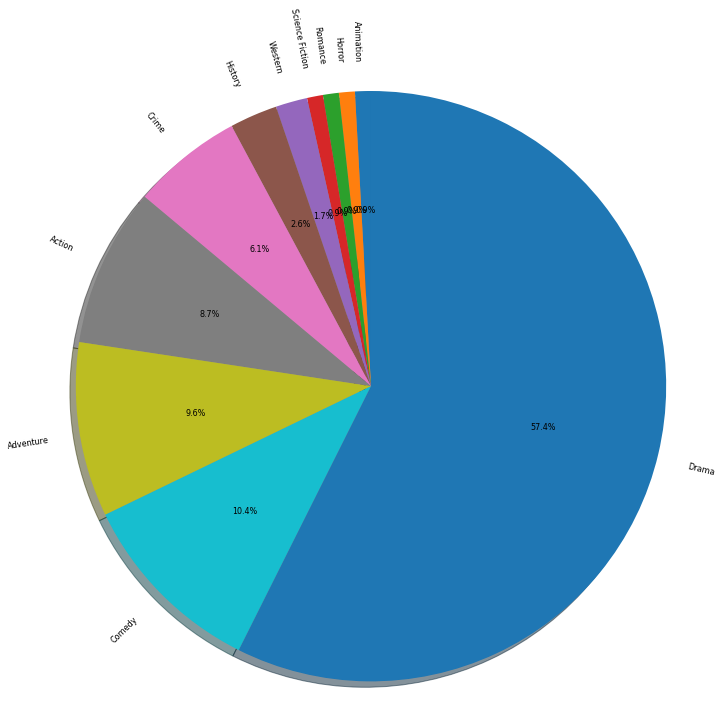

In [105]:
genre_percent(MostAwardsGenre)

In [ ]:
'''
Most Awards movies' Inflation Adjusted Gross Profit summary statistics
'''

In [585]:
MostAwards[["Gross Profit Inflation Adjusted"]].describe()

,Gross Profit Inflation Adjusted
count,1.150000e+02
mean,7.760489e+08
std,1.022521e+09
min,4.493367e+06
25%,1.481647e+08
50%,3.594933e+08
75%,1.015230e+09
max,7.157027e+09


In [ ]:
'''
MostAwards movies' Inflation Adjusted box plot has a few outliers on the upper outer fence
'''

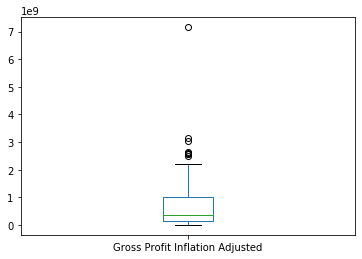

In [586]:
MostAwards[["Gross Profit Inflation Adjusted"]].plot.box();
#plt.savefig('magpbp.png')

In [ ]:
'''
Gone with the Wind Grossed the most profit, inflation adjusted, in history
'''

In [605]:
# Returns index of maximum 
MostAwards[['Gross Profit Inflation Adjusted']].idxmax() 
MostAwards.iloc[20]

Movie:                                                                                  21
Title                                                                   Gone with the Wind
Genre                                                                                Drama
Description                              The spoiled daughter of a well-to-do plantatio...
Budget                                                                               4e+06
Revenue                                                                        4.00176e+08
Gross Profit                                                                   3.96176e+08
(Academy Awards Season, Year in Film)                                                 1939
Number of Awards Won                                                                     8
Gross Profit Inflation Adjusted                                                7.15703e+09
Name: 20, dtype: object

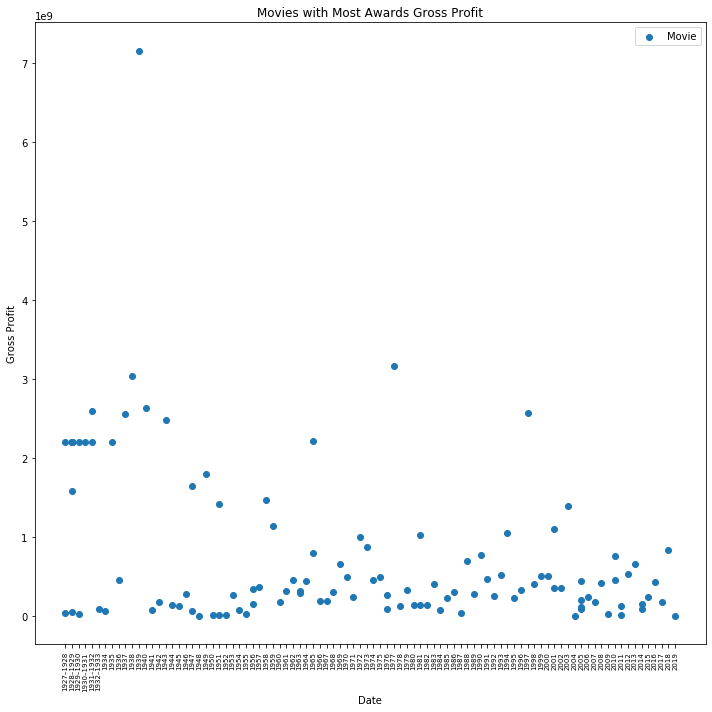

In [608]:
# Set the figure size in inches
plt.figure(figsize=(8,6))

plt.scatter(MostAwardsYear, MostAwards[["Gross Profit Inflation Adjusted"]],label = "Movie" )

# Set x and y axes labels and title
plt.xlabel('Date')
plt.xticks( rotation=90, fontsize=7);

plt.ylabel('Gross Profit')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Movies with Most Awards Gross Profit')
plt.legend()
plt.tight_layout()
#plt.savefig('magpsp.png')

In [90]:
'''
Count the most common 50 words in the total Most Awards movies' decriptions
'''

"\nCounts the most common 50 words in the total Most Awards movies' decriptions\n"

In [97]:
MostAwardsDescription=MostAwards[["Description"]]
MostAwardsDescription

,Description
0,A dejected Parisian sewer worker feels his pra...
1,"On his way to Vienna, American Jesse meets Cél..."
2,The Bridge of San Luis Rey is American author ...
3,"Harriet and Queenie Mahoney, a vaudeville act,..."
4,A Southern belle's flirtation with a working m...
...,...
111,"Mia, an aspiring actress, serves lattes to mov..."
112,"An other-worldly story, set against the backdr..."
113,"Singer Freddie Mercury, guitarist Brian May, d..."
114,Paul Dean has created a deadly parasite that i...


In [ ]:
'''
Family and Love are signifiacant frequent words
'''

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


[('the', 324), ('a', 200), ('of', 185), ('to', 177), ('and', 169), ('his', 100), ('in', 100), ('is', 70), ('with', 56), ('for', 42), ('he', 34), ('an', 33), ('by', 32), ('on', 31), ('their', 30), ('who', 27), ('her', 23), ('but', 22), ('as', 21), ('that', 20), ('into', 19), ('at', 19), ('be', 19), ('from', 18), ('life', 17), ('they', 16), ('has', 15), ('story', 15), ('family', 14), ('when', 13), ('love', 13), ('way', 13), ('one', 13), ('But', 13), ('young', 13), ('she', 12), ('New', 12), ('take', 12), ('find', 12), ('him', 11), ('up', 11), ('other', 11), ('are', 11), ('two', 11), ('lives', 10), ('The', 10), ('while', 10), ('more', 10), ('becomes', 10), ('each', 9), ('War', 9), ('during', 9), ('meets', 8), ('tells', 8), ('where', 8), ('man', 8), ('himself', 8), ('must', 8), ('He', 8), ('through', 8), ('As', 8), ('between', 7), ('about', 7), ('them', 7), ('it', 7), ('out', 7), ('against', 7), ('World', 7), ('just', 7), ('will', 7), ('English', 7), ('falls', 6), ('American', 6), ('being',

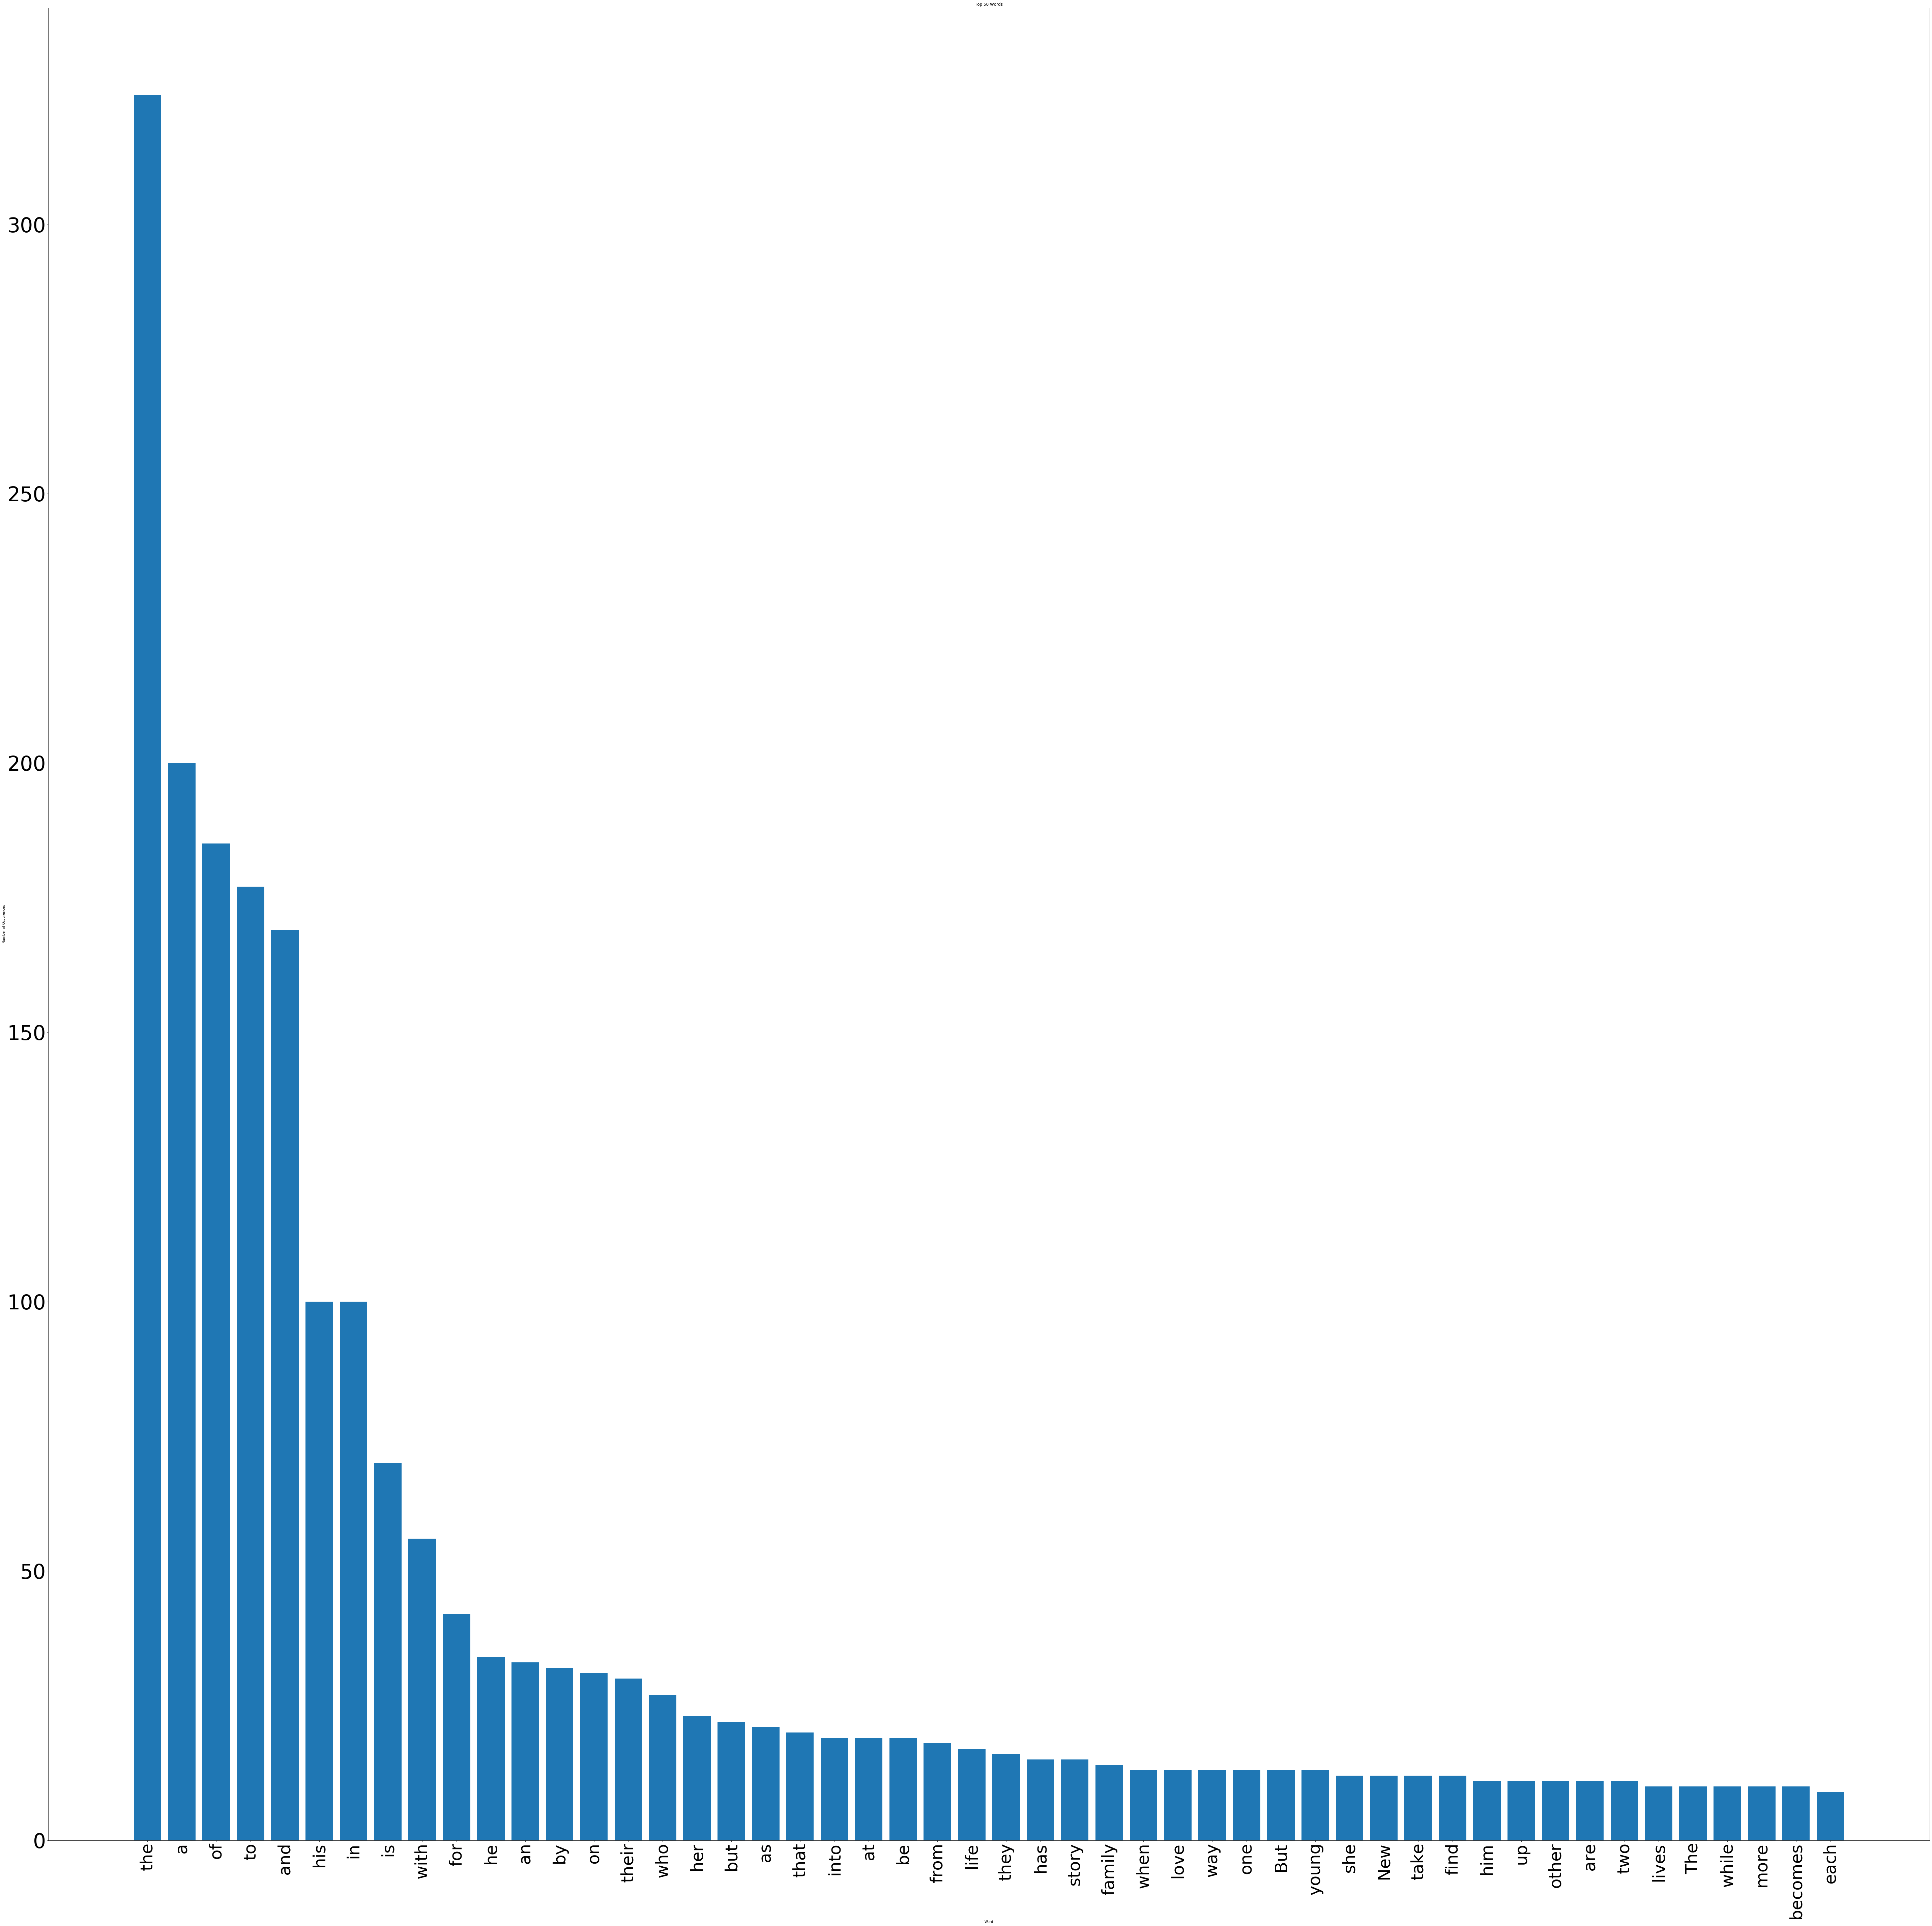

In [98]:
word_count(MostAwardsDescription)

In [ ]:
'''
From the Most Awards dataframe, determines whether a correlation between Number of Awards won and the respective
Gross Profit is apparent
'''

                                 Number of Awards Won  \
Number of Awards Won                         1.000000   
Gross Profit Inflation Adjusted             -0.116996   

                                 Gross Profit Inflation Adjusted  
Number of Awards Won                                   -0.116996  
Gross Profit Inflation Adjusted                         1.000000  
----
Correlation Coefficient:-0.11699560048104117


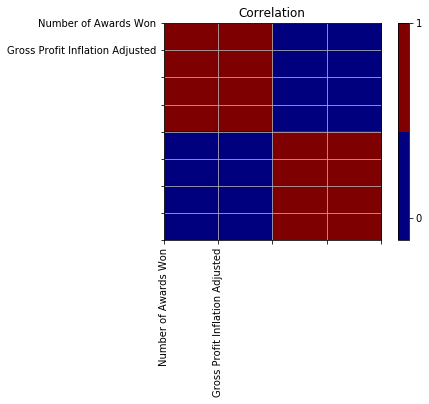

Mean
Number of Awards Won               4.965217e+00
Gross Profit Inflation Adjusted    7.760489e+08
dtype: float64
----
Median
Number of Awards Won               5.000000e+00
Gross Profit Inflation Adjusted    3.594933e+08
dtype: float64
----
Mode
   Number of Awards Won  Gross Profit Inflation Adjusted
0                   4.0                     2.209549e+09
----
Standard Deviation
Number of Awards Won               2.176148e+00
Gross Profit Inflation Adjusted    1.022521e+09
dtype: float64
----
Variance
Number of Awards Won               4.735622e+00
Gross Profit Inflation Adjusted    1.045550e+18
dtype: float64
----
Covariance
                                 Number of Awards Won  \
Number of Awards Won                     4.735622e+00   
Gross Profit Inflation Adjusted         -2.603337e+08   

                                 Gross Profit Inflation Adjusted  
Number of Awards Won                               -2.603337e+08  
Gross Profit Inflation Adjusted                     1.0

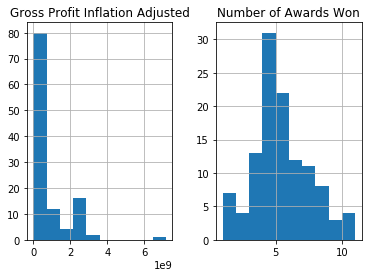

In [607]:



import pandas as pd

y=MostAwards["Number of Awards Won"]
x=MostAwards["Gross Profit Inflation Adjusted"]
x=x.abs()



Data=(y,x)
#print(Data)
df=pd.DataFrame(Data)
df=df.T


df=df.astype(float)
print(df.corr())
x=df["Number of Awards Won"].corr(df["Gross Profit Inflation Adjusted"])
print('----')
print(f"Correlation Coefficient:{x}")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 2)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation')
    labels=["Number of Awards Won","Gross Profit Inflation Adjusted"]
    ax1.set_xticklabels(labels,fontsize=10,rotation=90)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0,1])
    #plt.savefig('magpcm.png')
    
    plt.show()
    print('Mean')
    print(df.mean(axis=0))
    print('----')
    print('Median')
    print(df.median())
    print('----')
    print('Mode')
    print(df.mode())
    print('----')
    print('Standard Deviation')
    print(df.std(axis=0))
    print('----')
    print('Variance')
    print(df.var())
    print('----')
    print('Covariance')
    print(df.cov())
    print(df.hist())
    from scipy.stats import kurtosis, skew
    print ('Gross Profit Skewness =', skew(df["Gross Profit Inflation Adjusted"]))
    print ('Gross Profit Kurtosis =', kurtosis(df["Gross Profit Inflation Adjusted"]))
    print ('Number of Awards Won Skewness =', skew(df["Number of Awards Won"]))
    print ('Number of Awards Won Kurtosis =', kurtosis(df["Number of Awards Won"]))
    

   
  
    

correlation_matrix(df)

In [ ]:
'''
Conclusion:

-.12 is no correlation(technically a slight negative correlation) between Gross Profit and Number of Awards Won. 
While most highest gross profiting movies have occured in the past decade, Gone with the Wind, a drama, occured in 1939 
and grossed the most profit in history.  Gone with the Wind is about a romance, drama, during the Civil War, action.  
 
The most used genres for movies with highest gross profit were action and adventure.  The most used genre for movies 
that won the most awards was drama.  The most frequent significant words from the highest gross profit movie descriptions 
were help and world.  The most frequent significant words from the most award winning movies were family and love.An ideal 
movie for high gross profit is an action adventure that helps the world, while, to get the most awards, a drama about love 
and family. 

Movies such as ones by Marvel are action adventures with drama.  The question when making a movie is what the action and 
adventure to drama ratio should be in order to maximize positive externalities.  In future, I will be using statistics 
and algorithems to further analyze data.   


'''